In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):

    # The neuron numbers in the input layer should be the same number of features.
    # in practice, in hidden layers, the number of neurons could be at least the same number or features.
    # Here I used three hidden layers.
    def __init__(self, in_features=4, h1=8, h2=9, h3=8, out_features=3):
        # how many layers?
        # input layer (4 features) --> h1 N --> h2 N --> h3 N --> output (3 classes)
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x

In [4]:
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../Data/iris.csv')

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


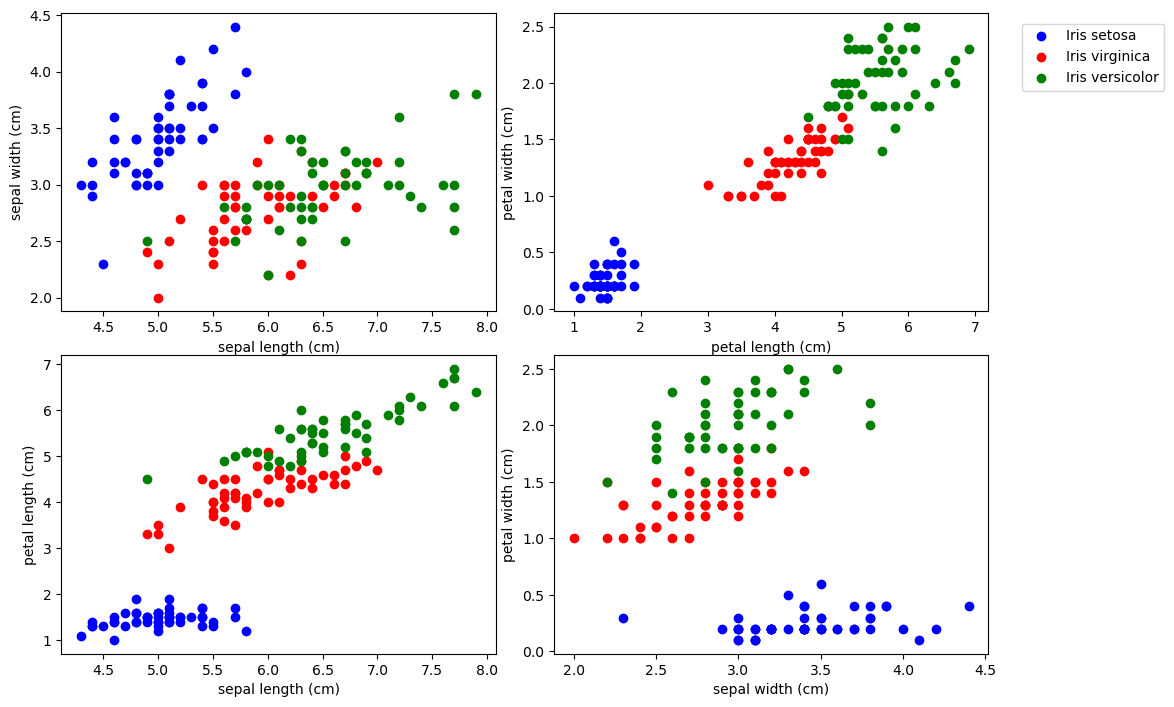

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
X = X.values
y = y.values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [19]:
# Transform NumPy format to tensor so that we can use these numbers for deep learning
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [22]:
y_train = torch.LongTensor(y_train)

In [23]:
y_test = torch.LongTensor(y_test)

In [24]:
# define loss function, here I use crossentropyloss

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
model.parameters()

<generator object Module.parameters at 0x0000018B1F30A7A0>

In [26]:
# Epochs: one epoch is one run through all the training data
# For large datasets, try small epochs first.
epochs = 300

# track losses
losses = []

for i in range (epochs):

    # Forward and get a prediction
    y_pred = model.forward(X_train)

    # calculate loss, because we are doing CrossEntropyLoss, we don't need to do one-hot encoding between y_pred and y_train
    loss = criterion(y_pred, y_train)

    losses.append(loss)

    # print out the loss every 10 epochs to check changes
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')

    # Backpropagation

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1577982902526855
Epoch 10 and loss is: 0.9961952567100525
Epoch 20 and loss is: 0.6829599738121033
Epoch 30 and loss is: 0.453104168176651
Epoch 40 and loss is: 0.3610523045063019
Epoch 50 and loss is: 0.22830931842327118
Epoch 60 and loss is: 0.11758299171924591
Epoch 70 and loss is: 0.07660264521837234
Epoch 80 and loss is: 0.06517110019922256
Epoch 90 and loss is: 0.060068514198064804
Epoch 100 and loss is: 0.05687524378299713
Epoch 110 and loss is: 0.05465179681777954
Epoch 120 and loss is: 0.0532790832221508
Epoch 130 and loss is: 0.05172992870211601
Epoch 140 and loss is: 0.050764571875333786
Epoch 150 and loss is: 0.04984935373067856
Epoch 160 and loss is: 0.04900725930929184
Epoch 170 and loss is: 0.04825703054666519
Epoch 180 and loss is: 0.04760421812534332
Epoch 190 and loss is: 0.047019004821777344
Epoch 200 and loss is: 0.047702427953481674
Epoch 210 and loss is: 0.046117667108774185
Epoch 220 and loss is: 0.045582596212625504
Epoch 230 and loss is: 

In [27]:
# Convert list of tensors to a list of NumPy arrays
losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in losses]

Text(0.5, 0, 'Epoch')

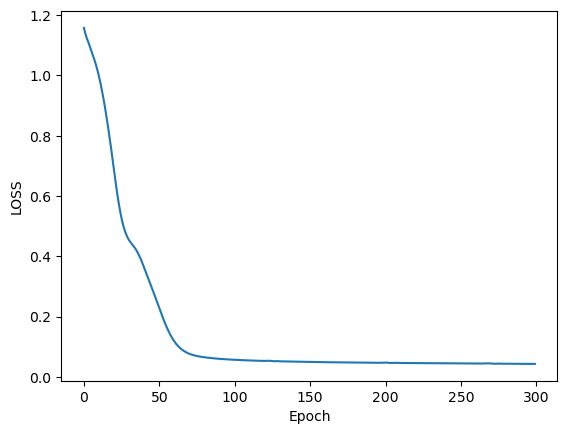

In [28]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

### Evaluate the model

In [29]:
# The following will affect the autogradient engine and deactivate it. No backpropagation needed to change weights and bias. Just for evaluation.
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [30]:
loss

tensor(0.0465)

### The loss value here is similar to the loss of training dataset. It means no overfitting.

In [32]:
# correct is used to store the number of correct predications
correct = 0

with torch.no_grad():

    #
    for i, data in enumerate(X_test):

        y_val = model.forward(data)

        # print(f'{i+1}.) {str(y_val)} {y_test[i]}')
        print(f'{i+1}.) {y_val.argmax().item()} {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct!')

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
We got 30 correct!


In [33]:
# save your model in pt file
torch.save(model.state_dict(), 'my_iris_model_sm.pt')

# if you want to save your entire model, including classes and parameters, you need to save it as a pickle file
# use the following codes: torch.save(model, 'my_iris_model_sm.pt')

In [34]:
# load your model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model_sm.pt'))

<All keys matched successfully>

In [35]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

### How to use the model on unseen dataset?

In [36]:
mystery_iris = torch.tensor([5.5, 4.2, 2.6, 0.7])

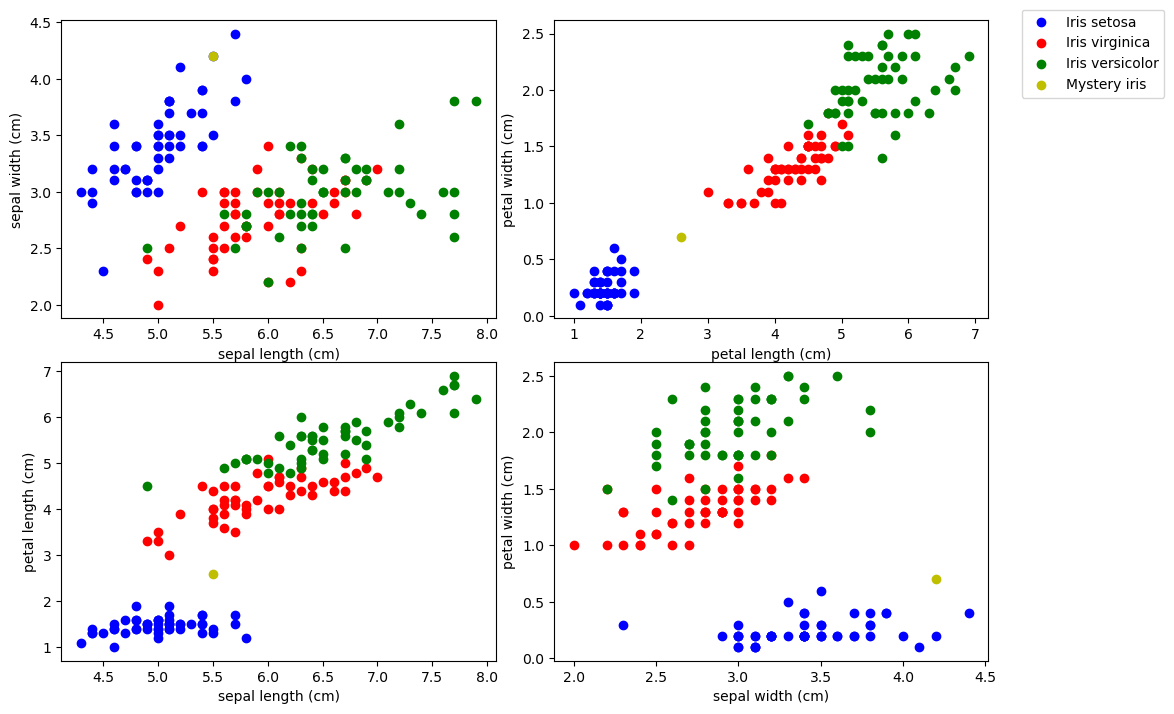

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [38]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  7.4740,  -0.4892, -30.5362])
tensor(0)
